---
# Covid-19 Analysis
---
Gruppo 3:

- Alessio Contin matr. 734792
- Stefano Santini matr. 726396

Laboratorio di Data Science

---
# Table of contents
1. [Introduzione](#introduction)
2. [Province](#province)
3. [Regioni](#regioni)

---
## Introduzione <a name="introduction"></a>

Inizialmente importiamo tutte le librerie necessarie all'esecuzione dei successivi codici.

In [1]:
# Importazione delle librerie
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import datetime as dt
import plotly.express as px

%matplotlib inline

I dataset impiegati sono quelli di Kaggle prelevati in data 23/03/2020, relativi all'Italia, uniti ad un dataset creato, sfruttando le infomrazioni presenti nei seguenti siti:

Attributo realtivo alla popolazione--> https://www.tuttitalia.it/regioni/popolazione/

Attributo relativo ai posti in terapia intensiva--> http://www.quotidianosanita.it/studi-e-analisi/articolo.php?articolo_id=82888

---
## Province <a name="province"></a>

Importiamo il dataset relativo alle province ed effettuiamo le prime analisi e visualizzazioni relative ad esso.

In [2]:
#carico il dataset 
province_italy=pd.read_csv('covid19_italy_province.csv')

In [3]:
#visualizziamo informazioni sulle colonne e sui loro tipi
province_italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 11 columns):
SNo                     3584 non-null int64
Date                    3584 non-null object
Country                 3584 non-null object
RegionCode              3584 non-null int64
RegionName              3584 non-null object
ProvinceCode            3584 non-null int64
ProvinceName            3584 non-null object
ProvinceAbbreviation    2968 non-null object
Latitude                3584 non-null float64
Longitude               3584 non-null float64
TotalPositiveCases      3584 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 308.1+ KB


In [4]:
#visualizziamo come è formato il dataset come numero di righe e colonne
province_italy.shape

(3584, 11)

Per avere una prima impressione sul contenuto del dataset visualizziamo alcune righe.

In [5]:
#visualizziamo le prime cinque righe
province_italy.head()

SNo                 Date Country  RegionCode RegionName  ProvinceCode  \
0    0  2020-02-24 18:00:00     ITA          13    Abruzzo            69   
1    1  2020-02-24 18:00:00     ITA          13    Abruzzo            66   
2    2  2020-02-24 18:00:00     ITA          13    Abruzzo            68   
3    3  2020-02-24 18:00:00     ITA          13    Abruzzo            67   
4    4  2020-02-24 18:00:00     ITA          13    Abruzzo           979   

                           ProvinceName ProvinceAbbreviation   Latitude  \
0                                Chieti                   CH  42.351032   
1                              L'Aquila                   AQ  42.351222   
2                               Pescara                   PE  42.464584   
3                                Teramo                   TE  42.658918   
4  In fase di definizione/aggiornamento                  NaN   0.000000   

   Longitude  TotalPositiveCases  
0  14.167546                   0  
1  13.398438                   0  
2  14.213648                   0  
3  13.704400                   0  
4   0.000000                   0

In [6]:
#visualizziamo le ultime cinque righe
province_italy.tail()

SNo                 Date Country  RegionCode RegionName  ProvinceCode  \
3579  3579  2020-03-22 17:00:00     ITA           5     Veneto            26   
3580  3580  2020-03-22 17:00:00     ITA           5     Veneto            27   
3581  3581  2020-03-22 17:00:00     ITA           5     Veneto            23   
3582  3582  2020-03-22 17:00:00     ITA           5     Veneto            24   
3583  3583  2020-03-22 17:00:00     ITA           5     Veneto           999   

                              ProvinceName ProvinceAbbreviation   Latitude  \
3579                               Treviso                   TV  45.667546   
3580                               Venezia                   VE  45.434905   
3581                                Verona                   VR  45.438390   
3582                               Vicenza                   VI  45.547497   
3583  In fase di definizione/aggiornamento                  NaN   0.000000   

      Longitude  TotalPositiveCases  
3579  12.245074                 935  
3580  12.338452                 732  
3581  10.993527                1046  
3582  11.545971                 631  
3583   0.000000                 199

Da una prima esplorazione del dataset, tramite le funzioni head() e tail(), notiamo che vi sono alcuni missing values, codificati come NaN nella colonna ProvinceAbbreviation, e come 'In fase di definizione/aggiornamento)' nella colonna ProvinceName.

Per avere più informazioni proviamo ad invocare la funzione describe() 

In [7]:
province_italy.ProvinceName.describe()

count                                     3584
unique                                     108
top       In fase di definizione/aggiornamento
freq                                       588
Name: ProvinceName, dtype: object

Invocando la funzione describe sulla feature ProvinceName notiamo che ha 108 valori univoci, ovvero i nomi delle 107 province, più il valore che consideriamo come nullo 'In fase di definizione/aggiornamento'

Utilizziamo la funzione describe anche sull'altra feature che contiene valori nulli, ovvero 'Province Abbreviation

In [8]:
province_italy.ProvinceAbbreviation.describe()

count     2968
unique     106
top         BS
freq        28
Name: ProvinceAbbreviation, dtype: object

Notiamo che vi sono 106 valori univoci, invece di 107, numero delle province. Indaghiamo ulteriormente visualizzando la parte di dataset che ha ProvinceAbbreviation nullo.

In [9]:
province_italy[province_italy.ProvinceAbbreviation.isnull()]

SNo                 Date Country  RegionCode     RegionName  \
4        4  2020-02-24 18:00:00     ITA          13        Abruzzo   
7        7  2020-02-24 18:00:00     ITA          17     Basilicata   
9        9  2020-02-24 18:00:00     ITA           4   P.A. Bolzano   
15      15  2020-02-24 18:00:00     ITA          18       Calabria   
19      19  2020-02-24 18:00:00     ITA          15       Campania   
...    ...                  ...     ...         ...            ...   
3568  3568  2020-03-22 17:00:00     ITA           9        Toscana   
3570  3570  2020-03-22 17:00:00     ITA           4    P.A. Trento   
3573  3573  2020-03-22 17:00:00     ITA          10         Umbria   
3575  3575  2020-03-22 17:00:00     ITA           2  Valle d'Aosta   
3583  3583  2020-03-22 17:00:00     ITA           5         Veneto   

      ProvinceCode                          ProvinceName ProvinceAbbreviation  \
4              979  In fase di definizione/aggiornamento                  NaN   
7              980  In fase di definizione/aggiornamento                  NaN   
9              981  In fase di definizione/aggiornamento                  NaN   
15             982  In fase di definizione/aggiornamento                  NaN   
19              63                                Napoli                  NaN   
...            ...                                   ...                  ...   
3568           995  In fase di definizione/aggiornamento                  NaN   
3570           996  In fase di definizione/aggiornamento                  NaN   
3573           997  In fase di definizione/aggiornamento                  NaN   
3575           998  In fase di definizione/aggiornamento                  NaN   
3583           999  In fase di definizione/aggiornamento                  NaN   

       Latitude  Longitude  TotalPositiveCases  
4      0.000000    0.00000                   0  
7      0.000000    0.00000                   0  
9      0.000000    0.00000                   0  
15     0.000000    0.00000                   0  
19    40.839566   14.25085                   0  
...         ...        ...                 ...  
3568   0.000000    0.00000                   0  
3570   0.000000    0.00000                   0  
3573   0.000000    0.00000                  17  
3575   0.000000    0.00000                   0  
3583   0.000000    0.00000                 199  

[616 rows x 11 columns]

Notiamo nella riga 5 che abbiamo l'attributo ProvinceName che ha come valore Napoli, mentre la rispettiva ProvinceAbbreviation risulta nulla. Questo perchè pandas ritiene che NA non sia l'abbreviazione di Napoli ma l'indicazione di un valore nullo. 

Gestiamo il problema dei valori nulli e dell'abbreviazione di Napoli.

In [10]:
#temp=province_italy
mask = province_italy.ProvinceName == 'Napoli'
column_name = 'ProvinceAbbreviation'
province_italy.loc[mask, column_name] = 'NAP'

Mostriamo come il dataset modificato adesso nella colonna relativa all'abbreviazione di Napoli non mostri più valore nullo ma il valore NAP

In [11]:
province_italy[province_italy.ProvinceAbbreviation == 'NAP'].head()

SNo                 Date Country  RegionCode RegionName  ProvinceCode  \
19    19  2020-02-24 18:00:00     ITA          15   Campania            63   
147  147  2020-02-25 18:00:00     ITA          15   Campania            63   
275  275  2020-02-26 18:00:00     ITA          15   Campania            63   
403  403  2020-02-27 18:00:00     ITA          15   Campania            63   
531  531  2020-02-28 18:00:00     ITA          15   Campania            63   

    ProvinceName ProvinceAbbreviation   Latitude  Longitude  \
19        Napoli                  NAP  40.839566   14.25085   
147       Napoli                  NAP  40.839566   14.25085   
275       Napoli                  NAP  40.839566   14.25085   
403       Napoli                  NAP  40.839566   14.25085   
531       Napoli                  NAP  40.839566   14.25085   

     TotalPositiveCases  
19                    0  
147                   0  
275                   0  
403                   3  
531                   4

In [12]:
#Prima di eliminare i nulli dal dataframe originario, li copiamo su un
#dataset temporaneo, nel caso ci servissero per qualche analisi successiva
temp=province_italy[province_italy['ProvinceAbbreviation'].isnull()]

Abbiamo deciso di rimuovere i valori nulli, in quanto i relativi valori di TotalPositiveCases variano molto, indicando che i valori che erano in fase di aggiornamento, in parte nei giorni successivi vengono attribuiti alle rispettive province.

In [13]:
#Rimuoviamo i valori nulli
province_italy.dropna(inplace=True)

In [14]:
#Verifichiamo che non ci siano più valori nulli
province_italy[province_italy.ProvinceAbbreviation.isnull()].count()

SNo                     0
Date                    0
Country                 0
RegionCode              0
RegionName              0
ProvinceCode            0
ProvinceName            0
ProvinceAbbreviation    0
Latitude                0
Longitude               0
TotalPositiveCases      0
dtype: int64

Abbiamo verificato che non ci siano più valori nulli, adesso vediamo le prime informazioni sul numero totale di positivi

In [15]:
province_italy.TotalPositiveCases.describe()

count    2996.000000
mean      142.242323
std       450.436504
min         0.000000
25%         0.000000
50%        13.000000
75%        86.000000
max      6216.000000
Name: TotalPositiveCases, dtype: float64

Per visualizzare meglio i dati, memorizziamo in un dataframe provvisorio i dati relativi all'ultima giornata presente, in modo da visualizzare il totale dei positivi corrente

In [16]:
currentDf=province_italy[province_italy.Date == province_italy.Date.max()]

Ordiniamo il dataframe per il totale dei casi positivi, in ordine decrescente, in modo da selezionare la top 10 delle province per numero di contagiati attuali.

In [17]:
#ordiniamo il dataframe
topDf=currentDf.sort_values(by='TotalPositiveCases', ascending=False)

In [18]:
#Selezioniamo la top10 delle province
topDf=topDf.iloc[:11,:]

In [19]:
#visualizziamo la top 10 delle province
topDf.head(10)

SNo                 Date Country  RegionCode      RegionName  \
3504  3504  2020-03-22 17:00:00     ITA           3       Lombardia   
3505  3505  2020-03-22 17:00:00     ITA           3       Lombardia   
3511  3511  2020-03-22 17:00:00     ITA           3       Lombardia   
3507  3507  2020-03-22 17:00:00     ITA           3       Lombardia   
3531  3531  2020-03-22 17:00:00     ITA           1        Piemonte   
3509  3509  2020-03-22 17:00:00     ITA           3       Lombardia   
3483  3483  2020-03-22 17:00:00     ITA           8  Emilia Romagna   
3513  3513  2020-03-22 17:00:00     ITA           3       Lombardia   
3577  3577  2020-03-22 17:00:00     ITA           5          Veneto   
3521  3521  2020-03-22 17:00:00     ITA          11          Marche   

      ProvinceCode     ProvinceName ProvinceAbbreviation   Latitude  \
3504            16          Bergamo                   BG  45.694414   
3505            17          Brescia                   BS  45.539931   
3511            15           Milano                   MI  45.466794   
3507            19          Cremona                   CR  45.133367   
3531             1           Torino                   TO  45.073274   
3509            98             Lodi                   LO  45.314407   
3483            33         Piacenza                   PC  45.051935   
3513            18            Pavia                   PV  45.185093   
3577            28           Padova                   PD  45.406930   
3521            41  Pesaro e Urbino                   PU  43.910140   

      Longitude  TotalPositiveCases  
3504   9.668425                6216  
3505  10.219103                5317  
3511   9.190347                5096  
3507  10.024209                2895  
3531   7.680687                1989  
3509   9.503721                1772  
3483   9.692633                1765  
3513   9.160157                1306  
3577  11.876087                1277  
3521  12.913460                1249

Per visualizzare meglio i dati, li proponiamo in formato visivo attraverso l'uso di grafici

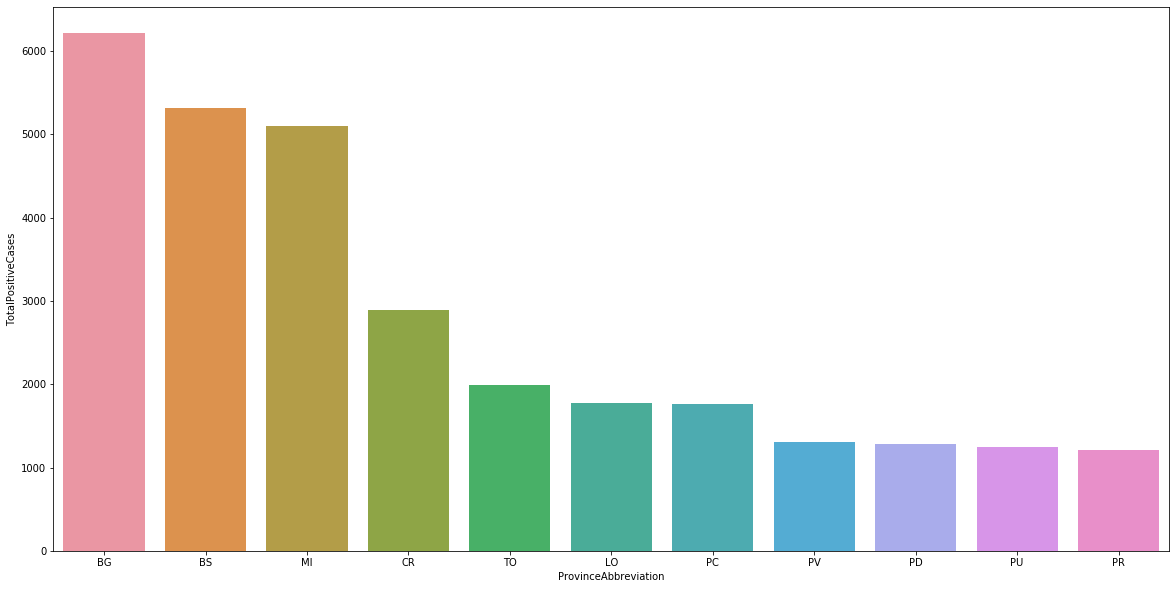

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot('ProvinceAbbreviation', 'TotalPositiveCases', data=topDf)

Dalla visualizzazione e analisi precedente notiamo che la maggior parte dei casi sono in Lombardia,Piemonte e Veneto, con alcuni anche in Marche ed Emilia Romagna. Per dare una visione globale, in rapporto anche alle province di altre regioni, diamo una visualizzazione grafica su una mappa interattiva.

In [21]:
#Visualizziamo su una mappa, utilizzando la libreria plotly
fig = px.scatter_geo(currentDf, lat='Latitude', lon='Longitude',
                     hover_name="ProvinceAbbreviation", size="TotalPositiveCases",
                     projection="natural earth", scope='europe', color="TotalPositiveCases", center={'lat':41.902782, 'lon':12.496366})
fig.show()

Dal dataframe precedente, contenente le top 10 province all'ultima data disponibile, ricaviamo le loro abbreviazioni 

In [22]:
provinces=[]
for i in topDf.ProvinceAbbreviation:
    provinces.append(i)
print(provinces)

['BG', 'BS', 'MI', 'CR', 'TO', 'LO', 'PC', 'PV', 'PD', 'PU', 'PR']


Utilizzando le abbreviazioni, partendo dal dataframe originale, otteniamo un nuovo dataframe contenente le informazioni relative a ciascuna delle province presenti nella top 10 per ogni giorno presente nel dataset.

In [23]:
#nuovo dataframe per top 10 province con arco temporale completo
topDfOverTime=province_italy[province_italy.ProvinceAbbreviation.isin(provinces)]

Mostriamo tramite grafici l'andamento del numero totale positivi nel corso dell'intero arco temporale presente per le province maggiormente colpite.

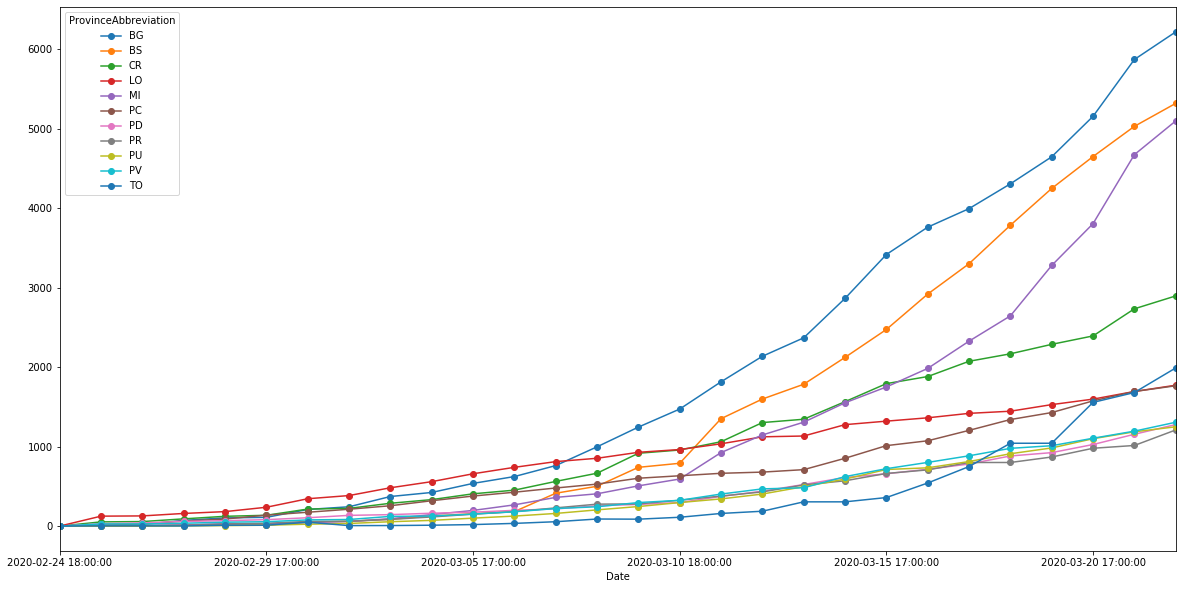

In [24]:
#grafico andamento
fig, ax = plt.subplots(figsize=(20,10))
topDfOverTime.groupby(['Date','ProvinceAbbreviation'])['TotalPositiveCases'].max().unstack().plot(ax=ax, marker= 'o')

Visualizziamo delle boxplot.

Text(0, 0.5, 'TotalPositiveCases')

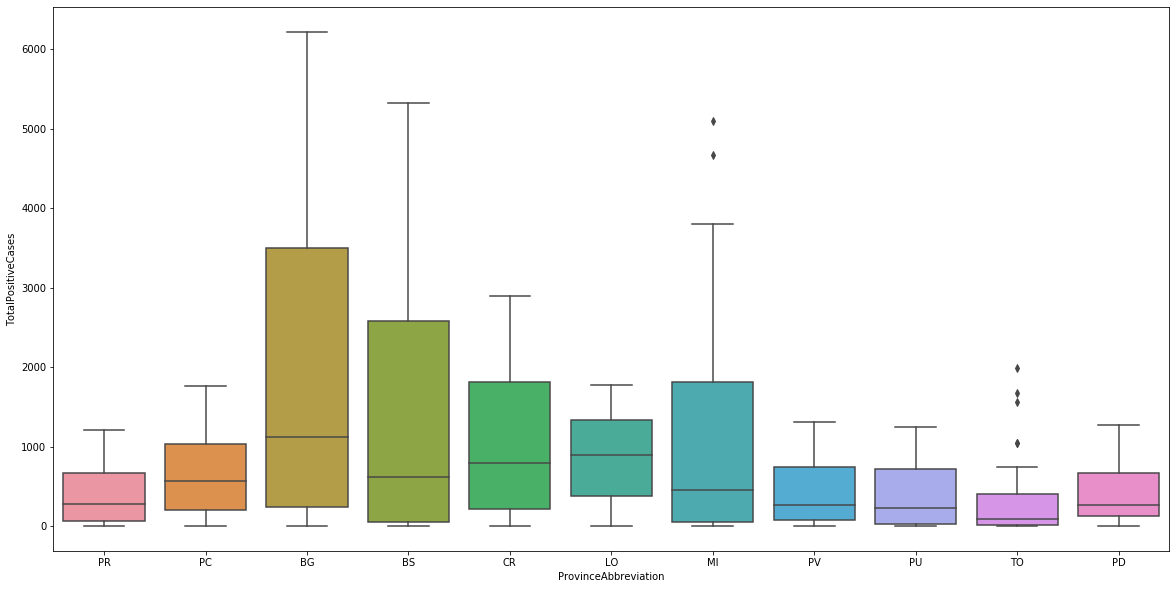

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot('ProvinceAbbreviation', 'TotalPositiveCases', data=topDfOverTime)
plt.xlabel('ProvinceAbbreviation') # Set text for the x axis
plt.ylabel('TotalPositiveCases')# Set text for y axis

Per dare una visione globale, in rapporto anche alle province di altre regioni nell'arco temporale completo, diamo una visualizzazione grafica su una mappa interattiva.

In [26]:
#mappa interattiva che mostra diffusione durante tutto arco temporale
fig = px.scatter_geo(province_italy, lat='Latitude', lon='Longitude', 
                     hover_name="ProvinceAbbreviation", size="TotalPositiveCases", animation_frame="Date",
                     projection="natural earth", scope='europe', color="TotalPositiveCases", center={'lat':41.902782, 'lon':12.496366})
fig.show()

---
Diamo un'occhiata all'andamento della provincia più colpita, ovvero Bergamo.

In [27]:
#creiamo un dataframe con i dati relativi a Bergamo
BG_df=province_italy[province_italy.ProvinceAbbreviation == 'BG']

Per capire meglio l'andamento del contagio, aggiungiamo una colonna che indica il numero del giorno dall'inizio dell'epidemia.

In [28]:
dateCount=province_italy[province_italy.ProvinceAbbreviation == 'BG'].Date.count()
ticks=range(0,dateCount,1)
BG_df=BG_df.sort_values(by='Date', ascending=True)
BG_df['DayNumber']=ticks
BG_df.head()

SNo                 Date Country  RegionCode RegionName  ProvinceCode  \
48    48  2020-02-24 18:00:00     ITA           3  Lombardia            16   
176  176  2020-02-25 18:00:00     ITA           3  Lombardia            16   
304  304  2020-02-26 18:00:00     ITA           3  Lombardia            16   
432  432  2020-02-27 18:00:00     ITA           3  Lombardia            16   
560  560  2020-02-28 18:00:00     ITA           3  Lombardia            16   

    ProvinceName ProvinceAbbreviation   Latitude  Longitude  \
48       Bergamo                   BG  45.694414   9.668425   
176      Bergamo                   BG  45.694414   9.668425   
304      Bergamo                   BG  45.694414   9.668425   
432      Bergamo                   BG  45.694414   9.668425   
560      Bergamo                   BG  45.694414   9.668425   

     TotalPositiveCases  DayNumber  
48                    0          0  
176                  18          1  
304                  20          2  
432                  72          3  
560                 103          4

Visualizziamo l'andamento tramite grafici.

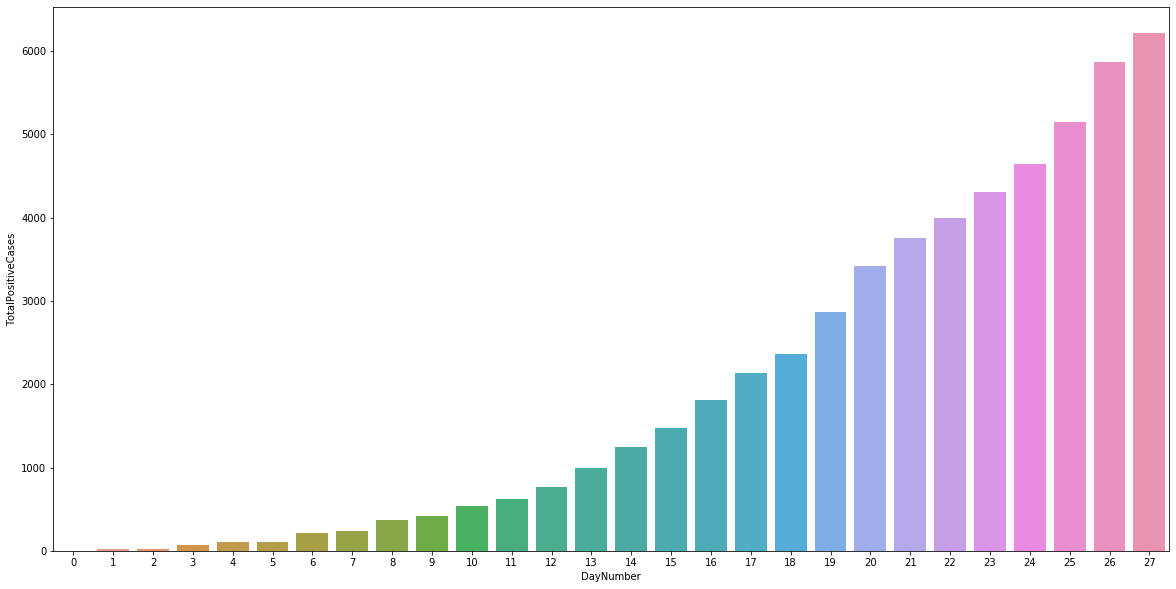

In [29]:
#province_italy[province_italy.ProvinceAbbreviation == 'BG']
fig, ax = plt.subplots(figsize=(20,10))
g=sns.barplot('DayNumber', 'TotalPositiveCases', data=BG_df)

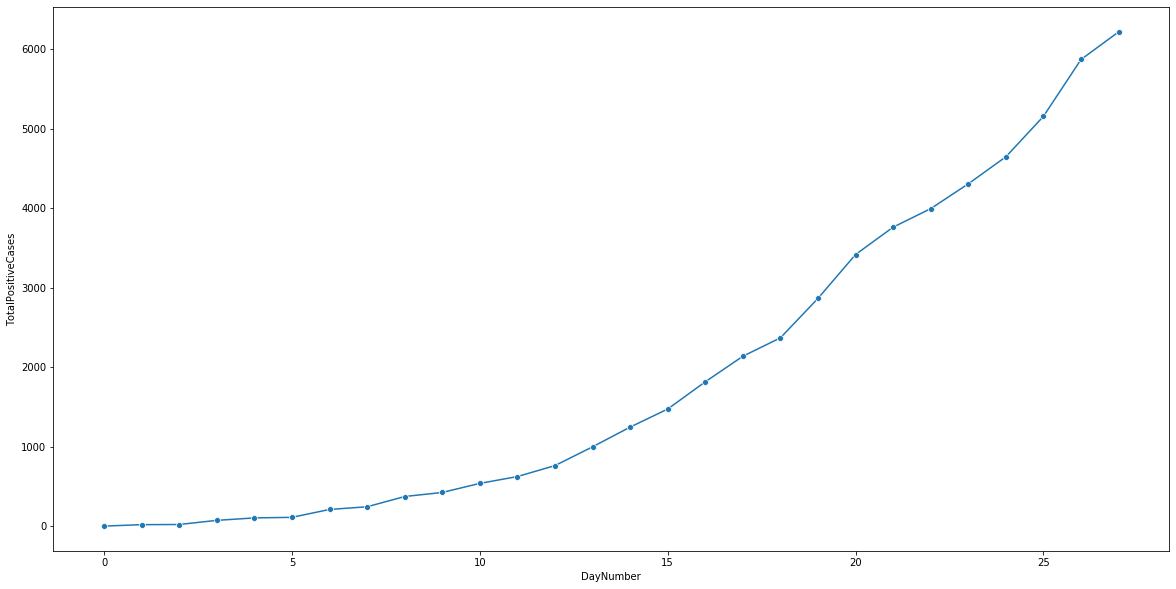

In [30]:
#sns.lineplot(data=prova, palette="tab10", linewidth=2.5)
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot('DayNumber', 'TotalPositiveCases', data=BG_df, marker='o')

Notiamo che l'andamento segue una curva molto accentuata, quasi esponenziale, con un numero di contagi superiore anche a città più grandi come ad esempio Milano. Resta da capire perchè il numero di contagi si è concentrato in Lombardia, se c'è stato qualche evento particolare, o se c'è qualche relazione anche in base a parametri e risultati che vedremo nella sezione sulle regioni, analizzando il relativo dataset, che contiene dati aggiuntivi come il numero di decessi, di ospedalizzati, di positivi e nuovi positivi, nonchè il numero di tamponi e di posti letto in terapia intensiva. 

---
## Regioni <a name="regioni"></a>

Come nella sezione precedente, importiamo i dataset effettuiamo le prime analisi e visualizzazioni.

In [31]:
#caricamento dataset
regione_orig = pd.read_csv('covid19_italy_region.csv')
popolazioni_orig=pd.read_csv('popolazioni.csv')

In [32]:
regione = regione_orig.copy() 
popolazioni=popolazioni_orig.copy()

In [33]:
regione.shape

(588, 17)

In [34]:
regione.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 17 columns):
SNo                          588 non-null int64
Date                         588 non-null object
Country                      588 non-null object
RegionCode                   588 non-null int64
RegionName                   588 non-null object
Latitude                     588 non-null float64
Longitude                    588 non-null float64
HospitalizedPatients         588 non-null int64
IntensiveCarePatients        588 non-null int64
TotalHospitalizedPatients    588 non-null int64
HomeConfinement              588 non-null int64
CurrentPositiveCases         588 non-null int64
NewPositiveCases             588 non-null int64
Recovered                    588 non-null int64
Deaths                       588 non-null int64
TotalPositiveCases           588 non-null int64
TestsPerformed               588 non-null int64
dtypes: float64(2), int64(12), object(3)
memory usage: 78.2+ KB


In [35]:
#visualizziamo primi cinque elementi
regione.head()

SNo                 Date Country  RegionCode    RegionName   Latitude  \
0    0  2020-02-24 18:00:00     ITA          13       Abruzzo  42.351222   
1    1  2020-02-24 18:00:00     ITA          17    Basilicata  40.639471   
2    2  2020-02-24 18:00:00     ITA           4  P.A. Bolzano  46.499335   
3    3  2020-02-24 18:00:00     ITA          18      Calabria  38.905976   
4    4  2020-02-24 18:00:00     ITA          15      Campania  40.839566   

   Longitude  HospitalizedPatients  IntensiveCarePatients  \
0  13.398438                     0                      0   
1  15.805148                     0                      0   
2  11.356624                     0                      0   
3  16.594402                     0                      0   
4  14.250850                     0                      0   

   TotalHospitalizedPatients  HomeConfinement  CurrentPositiveCases  \
0                          0                0                     0   
1                          0                0                     0   
2                          0                0                     0   
3                          0                0                     0   
4                          0                0                     0   

   NewPositiveCases  Recovered  Deaths  TotalPositiveCases  TestsPerformed  
0                 0          0       0                   0               5  
1                 0          0       0                   0               0  
2                 0          0       0                   0               1  
3                 0          0       0                   0               1  
4                 0          0       0                   0              10

In [36]:
#visualizziamo ultimi cinque elementi
regione.tail()

SNo                 Date Country  RegionCode     RegionName   Latitude  \
583  583  2020-03-22 17:00:00     ITA           9        Toscana  43.769231   
584  584  2020-03-22 17:00:00     ITA           4    P.A. Trento  46.068935   
585  585  2020-03-22 17:00:00     ITA          10         Umbria  43.106758   
586  586  2020-03-22 17:00:00     ITA           2  Valle d'Aosta  45.737503   
587  587  2020-03-22 17:00:00     ITA           5         Veneto  45.434905   

     Longitude  HospitalizedPatients  IntensiveCarePatients  \
583  11.255889                   706                    215   
584  11.121231                   235                     46   
585  12.388247                    97                     35   
586   7.320149                    63                     21   
587  12.338452                  1113                    255   

     TotalHospitalizedPatients  HomeConfinement  CurrentPositiveCases  \
583                        921             1223                  2144   
584                        281              604                   885   
585                        132              368                   500   
586                         84              270                   354   
587                       1368             3276                  4644   

     NewPositiveCases  Recovered  Deaths  TotalPositiveCases  TestsPerformed  
583               239         42      91                2277           13264  
584               165         34      35                 954            3050  
585                53          5      16                 521            3135  
586                50          1       9                 364             950  
587               430        309     169                5122           57671

In [37]:
#Seleziono gli elementi degli attributi relativi all'ultimo giorno, dato che ogni elemento è cumulativo 
regione_new = regione[regione["Date"] == max(regione["Date"])].reset_index()

In [38]:
max(regione["Date"])
regione_new

index  SNo                 Date Country  RegionCode  \
0     567  567  2020-03-22 17:00:00     ITA          13   
1     568  568  2020-03-22 17:00:00     ITA          17   
2     569  569  2020-03-22 17:00:00     ITA           4   
3     570  570  2020-03-22 17:00:00     ITA          18   
4     571  571  2020-03-22 17:00:00     ITA          15   
5     572  572  2020-03-22 17:00:00     ITA           8   
6     573  573  2020-03-22 17:00:00     ITA           6   
7     574  574  2020-03-22 17:00:00     ITA          12   
8     575  575  2020-03-22 17:00:00     ITA           7   
9     576  576  2020-03-22 17:00:00     ITA           3   
10    577  577  2020-03-22 17:00:00     ITA          11   
11    578  578  2020-03-22 17:00:00     ITA          14   
12    579  579  2020-03-22 17:00:00     ITA           1   
13    580  580  2020-03-22 17:00:00     ITA          16   
14    581  581  2020-03-22 17:00:00     ITA          20   
15    582  582  2020-03-22 17:00:00     ITA          19   
16    583  583  2020-03-22 17:00:00     ITA           9   
17    584  584  2020-03-22 17:00:00     ITA           4   
18    585  585  2020-03-22 17:00:00     ITA          10   
19    586  586  2020-03-22 17:00:00     ITA           2   
20    587  587  2020-03-22 17:00:00     ITA           5   

               RegionName   Latitude  Longitude  HospitalizedPatients  \
0                 Abruzzo  42.351222  13.398438                   218   
1              Basilicata  40.639471  15.805148                    13   
2            P.A. Bolzano  46.499335  11.356624                   146   
3                Calabria  38.905976  16.594402                    77   
4                Campania  40.839566  14.250850                   243   
5          Emilia Romagna  44.494367  11.341721                  2429   
6   Friuli Venezia Giulia  45.649435  13.768136                   163   
7                   Lazio  41.892770  12.483667                   671   
8                 Liguria  44.411493   8.932699                   736   
9               Lombardia  45.466794   9.190347                  9439   
10                 Marche  43.616760  13.518875                   816   
11                 Molise  41.557748  14.659161                    24   
12               Piemonte  45.073274   7.680687                  2118   
13                 Puglia  41.125596  16.867367                   252   
14               Sardegna  39.215312   9.110616                    67   
15                Sicilia  38.115697  13.362357                   220   
16                Toscana  43.769231  11.255889                   706   
17            P.A. Trento  46.068935  11.121231                   235   
18                 Umbria  43.106758  12.388247                    97   
19          Valle d'Aosta  45.737503   7.320149                    63   
20                 Veneto  45.434905  12.338452                  1113   

    IntensiveCarePatients  TotalHospitalizedPatients  HomeConfinement  \
0                      49                        267              272   
1                      10                         23               58   
2                      32                        178              470   
3                      17                         94              166   
4                      99                        342              524   
5                     269                       2698             3692   
6                      47                        210              528   
7                      79                        750              522   
8                     132                        868              483   
9                    1142                      10581             7304   
10                    138                        954             1277   
11                      7                         31               21   
12                    308                       2426             1701   
13                     37                        289              459   
14 

------------------------------------------------------------------------------------------------------
LEGENDA

Se a t(2) ho CurrentPositive=100 questo è uguale a NewPositive(t(0))+NewPositive(t(1))

"TotalHospitalizedPatient" + "HomeConfinement" = "CurrentPositive"

"IntensiveCare" + "HospitalizedPatient" = "TotalHospitalizedPatients"

"CurrentPositive" + "Deaths" + "Recovered" = "TotalPositiveCases"

Viene evidenziata una dipendenza tra i vari attributi.


SPIEGAZIONE VARIABILI

ratio_PIR_Pop: corrisponde al rapporto tra i posti letto in terapia intensiva a regime con tuatta la popolazione (entrambi i parametri sono relativi alla regione).

ratio_IC_HP: corrisponde al rapporto tra i pazienti in terapia intensiva e quelli ospedalizzati (entrambi i parametri sono relativi alla regione).

ratio_TPC_TeP: rappresenta il rapporto tra i casi positivi totali e il numero di test (tamponi) eseguiti sulla popolazione (entrambi i parametri sono relativi alla regione).

ratio_TPC_Pop: definito anche come prevalenza, rappresenta il numero di casi positivi totali rispetto alla popolazione (entrambi i parametri sono relativi alla regione).

ratio_D_Pop: definito anche come tasso di mortalità, corrisponde ai decessi sul totale della popolazione (entrambi i parametri sono relativi alla regione).

ratio_TCP_Pop_gg: definito anche come tasso di incidenza grezzo, definisce il numero di casi in un dato intervallo temporale (entrambi i parametri sono relativi alla regione).

proportion_IC_HP_TPC: proporzione tra tutti i pazienti in ospedale e il numero di casi positivi totali (entrambi i parametri sono relativi alla regione).

proportion_HC_TPC: proporzione tra il numero di paziento hospedalizzati e il totale delle persone che hanno la patologia (entrambi i parametri sono relativi alla regione).

proportion_CPC_TPC: proporzione tra totale dei pazienti in ospedale sommato a quelli confinati a casa e il numero di casi positivi totali (entrambi i parametri sono relativi alla regione).

proportion_R_TPC: proporzione tra il numero di guariti e il numero di casi positivi totali (entrambi i parametri sono relativi alla regione).

proportion_IC_PIR: definita anche come indice di occupazione, definisce il numero di posti letto occupati, in questo caso in terapia intensiva (entrambi i parametri sono relativi alla regione).

proportion_D_TPC: definita anche come letalità, definisce il numero di decessi sul totale della popolazione (entrambi i parametri sono relativi alla regione). 

---------------------------------------------------------------------------------------------------------------

In [39]:
#Raggruppo per regione e seleziono gli attributi di interesse
regione_new2=regione_new.groupby('RegionName')['HospitalizedPatients','CurrentPositiveCases', 'Deaths', 'IntensiveCarePatients', 'Recovered', 
                                               'HomeConfinement', 'TotalPositiveCases', 'TestsPerformed'].max()

In [40]:
#Inserisco nella tabella creata alcuni nuovi attributi di interesse e alcune misure di incidenza epidemiologica
regione_new2.insert(regione_new2.shape[-1], 'Popolazione', popolazioni['Popolazione'].values)
regione_new2.insert(regione_new2.shape[-1], 'PostiIntensivaRegime', popolazioni['PostiIntensivaRegime'].values)
#Valore di posti Intensivi x 10000
regione_new2.insert(regione_new2.shape[-1], 'ratio_PIR_Pop', (regione_new2['PostiIntensivaRegime']/regione_new2['Popolazione'])*10000)
#Valori percentuali
regione_new2.insert(regione_new2.shape[-1],'ratio_IC_HP', (regione_new2['IntensiveCarePatients']/regione_new2['HospitalizedPatients'])*100)
regione_new2.insert(regione_new2.shape[-1],'ratio_TPC_TeP', (regione_new2['TotalPositiveCases']/regione_new2['TestsPerformed'])*100)
#Prevalenza x 10000 abitanti
regione_new2.insert(regione_new2.shape[-1], 'ratio_TPC_Pop', (regione_new2['TotalPositiveCases']/regione_new2['Popolazione'])*10000)
#Mortalità x 10000 abitanti
regione_new2.insert(regione_new2.shape[-1], 'ratio_D_Pop', (regione_new2['Deaths']/regione_new2['Popolazione'])*10000)
#Tasso di Incidenza x 100000 abitanti
regione_new2.insert(regione_new2.shape[-1], 'ratio_TCP_Pop_gg', (regione_new2['TotalPositiveCases']/(regione_new2['Popolazione']*28))*100000)

In [41]:
#Valori percentuali
regione_new2.insert(regione_new2.shape[-1],'proportion_IC_HP_TPC', ((regione_new2['HospitalizedPatients']+regione_new2['IntensiveCarePatients'])/regione_new2['TotalPositiveCases'])*100)
regione_new2.insert(regione_new2.shape[-1],'proportion_HC_TPC', (regione_new2['HomeConfinement']/regione_new2['TotalPositiveCases'])*100)
regione_new2.insert(regione_new2.shape[-1],'proportion_CPC_TPC', (regione_new2['CurrentPositiveCases']/regione_new2['TotalPositiveCases'])*100)
regione_new2.insert(regione_new2.shape[-1],'proportion_R_TPC', (regione_new2['Recovered']/regione_new2['TotalPositiveCases'])*100)
# %Occupazione
regione_new2.insert(regione_new2.shape[-1],'proportion_IC_PIR', (regione_new2['IntensiveCarePatients']/regione_new2['PostiIntensivaRegime'])*100)
# %Letalità 
regione_new2.insert(regione_new2.shape[-1],'proportion_D_TPC', (regione_new2['Deaths']/regione_new2['TotalPositiveCases'])*100)




In [42]:
#Stampo a video il dataframe
regione_new2

HospitalizedPatients  CurrentPositiveCases  Deaths  \
RegionName                                                                  
Abruzzo                                 218                   539      33   
Basilicata                               13                    81       0   
Calabria                                 77                   260       8   
Campania                                243                   866      29   
Emilia Romagna                         2429                  6390     816   
Friuli Venezia Giulia                   163                   738      47   
Lazio                                   671                  1272      53   
Liguria                                 736                  1351     171   
Lombardia                              9439                 17885    3456   
Marche                                  816                  2231     184   
Molise                                   24                    52       7   
P.A. Bolzano                            146                   648      23   
P.A. Trento                             235                   885      35   
Piemonte                               2118                  4127     283   
Puglia                                  252                   748      31   
Sardegna                                 67                   327       7   
Sicilia                                 220                   596       8   
Toscana                                 706                  2144      91   
Umbria                                   97                   500      16   
Valle d'Aosta                            63                   354       9   
Veneto                                 1113                  4644     169   

                       IntensiveCarePatients  Recovered  HomeConfinement  \
RegionName                                                                 
Abruzzo                                   49         15              272   
Basilicata                                10          0               58   
Calabria                                  17          5              166   
Campania                                  99         41              524   
Emilia Romagna                           269        349             3692   
Friuli Venezia Giulia                     47         89              528   
Lazio                                     79         58              522   
Liguria                                  132        143              483   
Lombardia                               1142       5865             7304   
Marche                                   138          6             1277   
Molise                                     7          7               21   
P.A. Bolzano                              32          7              470   
P.A. Trento                               46         34              604   
Piemonte                                 308         10             1701   
Puglia                                    37          7              459   
Sardegna                                  16          5              244   
Sicilia                                   55         26              321   
Toscana                                  215         42             1223   
Umbria                                    35          5              368   
Valle d'Aosta                             21          1              270   
Veneto                                   255        309             3276   

                       TotalPositiveCases  TestsPerformed  Popolazione  \
RegionName                                                               
Abruzzo                               587            3375      1311580   
Basilicata                             81             643       562869   
Calabria                              273            3666      1947131   
Campania                              936            4943      5801692   
Emilia Romagna                       7555           28022 

In [43]:
#Stampo a video i dati di ogni regione, sfruttando una funzione di Pandas per evidenziare i dati sulla base della 
#loro rilevanza all'interno della colonna
regione_new2.style.background_gradient()

In [44]:
#Raggruppo per regione e seleziono gli attributi del dataset originale per ottenere una valutazione sull'italia
regione_new3=regione_new.groupby('Date')['HospitalizedPatients','CurrentPositiveCases', 'Deaths', 'IntensiveCarePatients', 'Recovered', 
                                               'HomeConfinement', 'TotalPositiveCases', 'TestsPerformed'].sum()
regione_new3.insert(regione_new3.shape[-1], 'Popolazione', popolazioni['Popolazione'].values.sum())

In [45]:
#Stampo i dati totali di tutte le regioni per avere una visione globale
regione_new3.style.background_gradient()

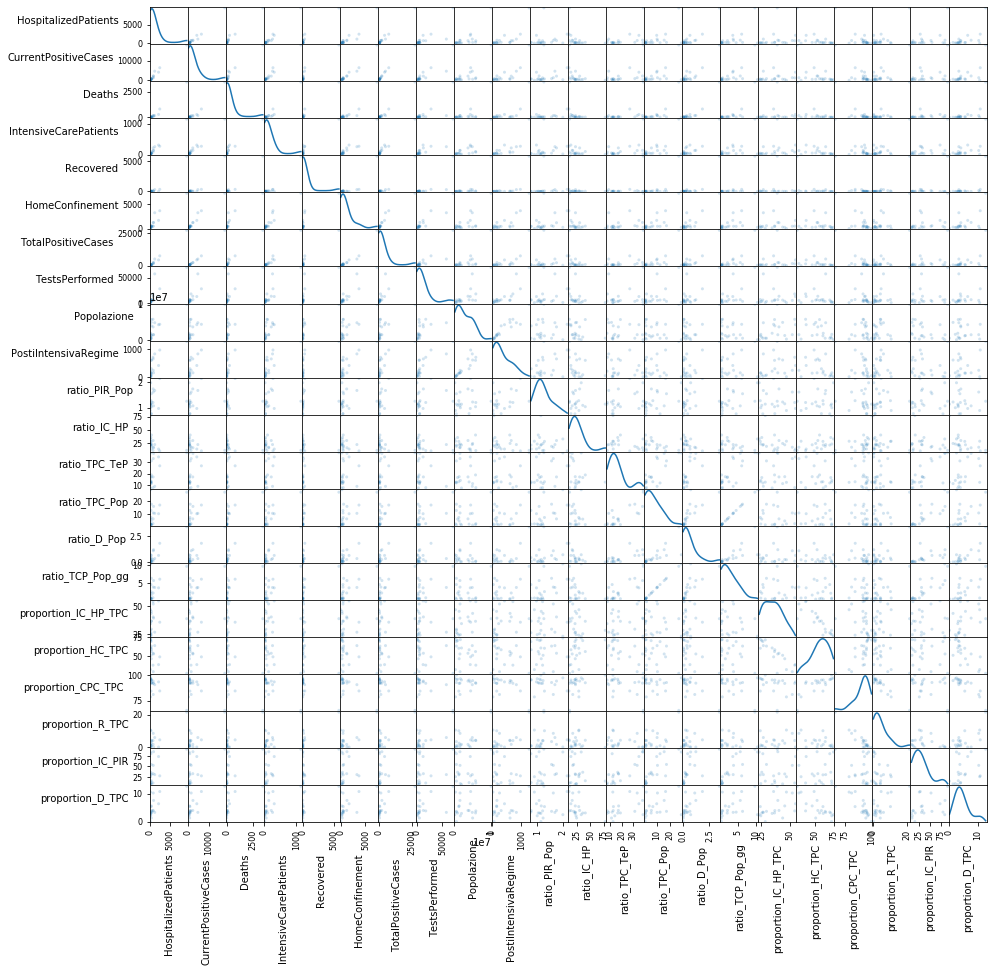

In [46]:
#Realizzazione di un grafico delle dispersioni per ogni attributo
scatterplot_matrix  = pd.plotting.scatter_matrix(regione_new2, alpha=0.2, figsize=(15, 15), diagonal='kde')
for ax in scatterplot_matrix.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

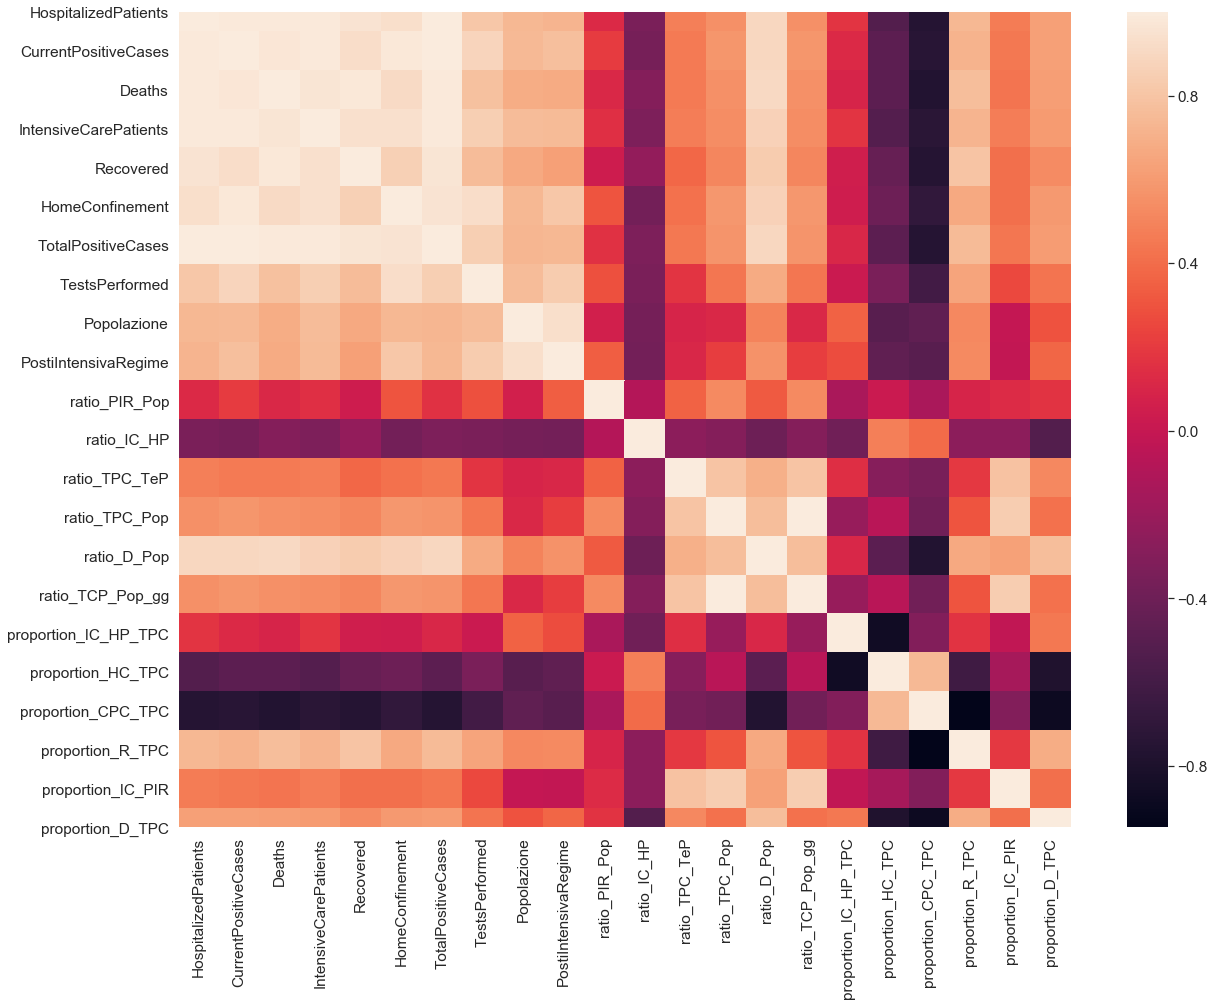

In [47]:
#Dato che il grafico delle dispersioni è poco utile a intuire eventuali relazioni si effettua un matrice di correlazioni
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
sns.heatmap(regione_new2.corr())
plt.show()

Dalla matrice di correlazione si evidenzia il fatto che è presente un'effettiva dipendenza tra gli attributi appartenenti al dataset originele, uniti anche ai due attributi definiti come 'Popolazione' e 'PostiIntensivaRegime'. In questo contesto la correlazione è diretta. 
Per le misure di incidenza si evidenziano casi in cui si ha una una correlazione diretta, ma anche casi in cui tale correlazione è indiretta, ciò è dovuto alla natura dell'operazione matematica di rapporto e proporzione. A tal proposito si nota la presenza anche di bassi valori di correlazione compresi tra -0.4 e 0.4.

In [48]:
#Esecuzione di un sort dei dati all'interno di ogni attributo
pop= popolazioni.sort_values(by= ['Popolazione'], ascending=False)
positive_cases = regione_new.sort_values(by = ['CurrentPositiveCases'], ascending=False)
intensive_cases= regione_new.sort_values(by = ['IntensiveCarePatients'], ascending=False)
recovered= regione_new.sort_values(by = ['Recovered'], ascending=False)
home_confinement = regione_new.sort_values(by = ['HomeConfinement'], ascending=False)
deaths= regione_new.sort_values(by = ['Deaths'], ascending=False)

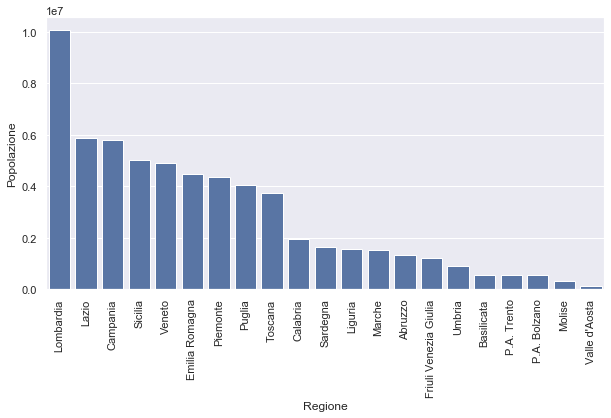

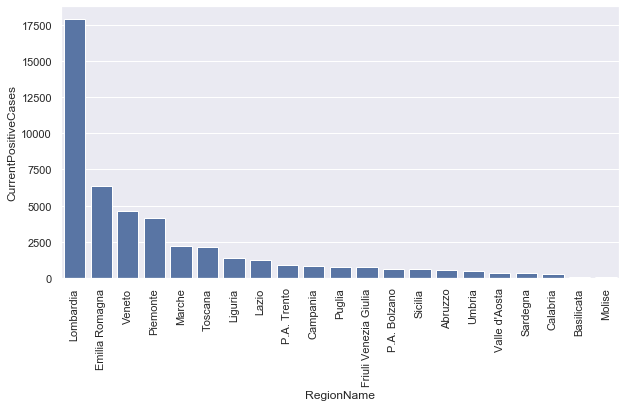

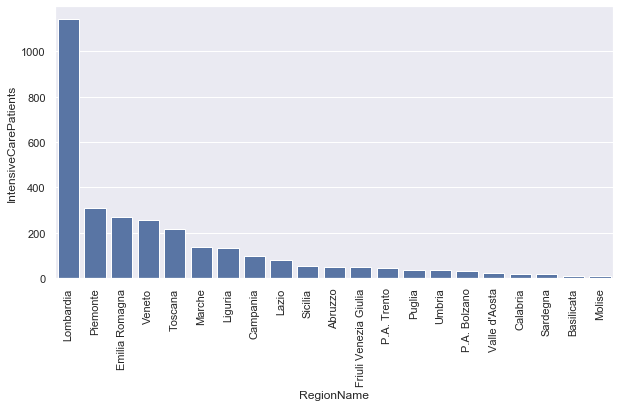

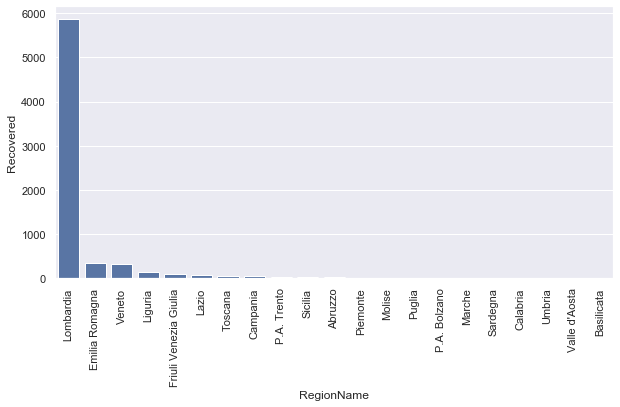

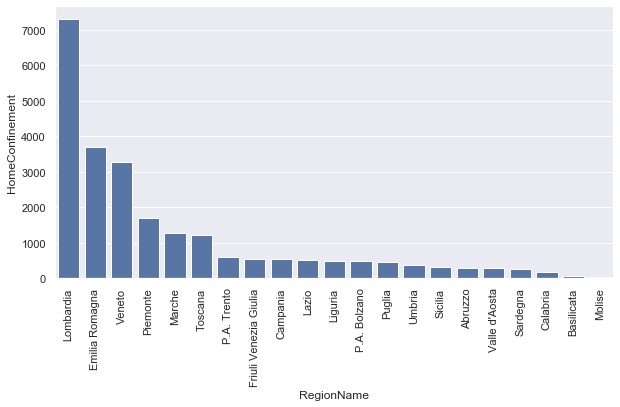

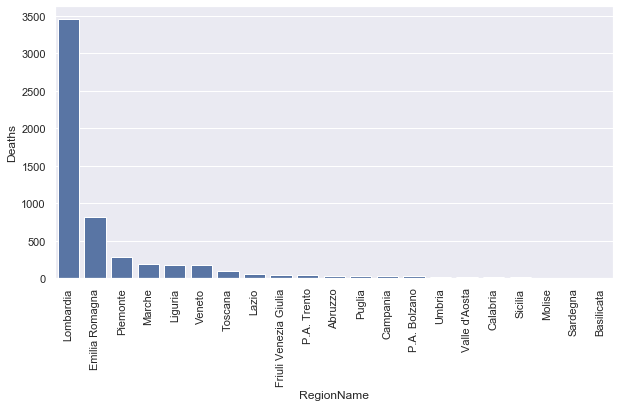

In [49]:
#settaggio paerametri per il plot
sns.set(style = "darkgrid")

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.barplot(pop.Regione, pop.Popolazione, color='b')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.barplot(positive_cases.RegionName, positive_cases.CurrentPositiveCases, color='b')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.barplot(intensive_cases.RegionName, intensive_cases.IntensiveCarePatients, color='b')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.barplot(recovered.RegionName, recovered.Recovered, color='b')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.barplot(home_confinement.RegionName, home_confinement.HomeConfinement, color='b')
plt.show()

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.barplot(deaths.RegionName, deaths.Deaths, color='b')
plt.show()

Le raffigurazioni grafiche mostrano come per tutti gli attributi scelti la Lombardia occupi sempre la prima posizione, seguita, nella maggior parte dei casi, dall'Emilia Romagna.
Per valutare se effettivamente tali regioni sono quelle più colpite si eseguono le rappresentazioni grafiche di alcuni degli indici creati.

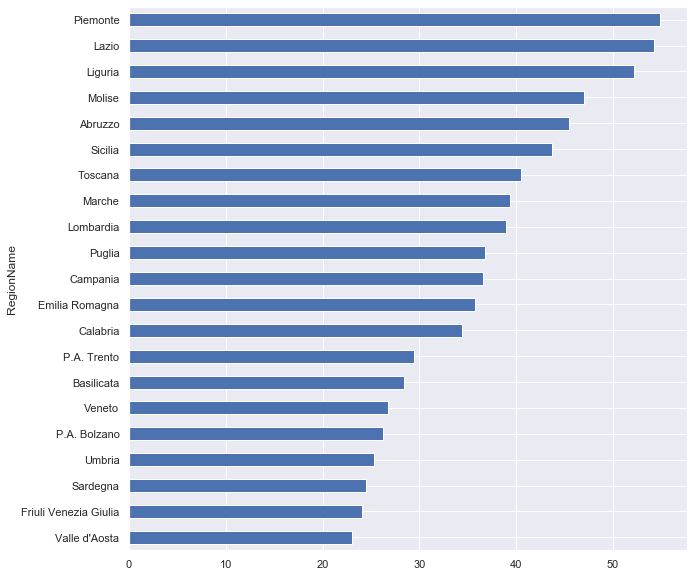

In [50]:
# Risultati in %
regione_new2['proportion_IC_HP_TPC'].sort_values().plot.barh(figsize=(10,10))

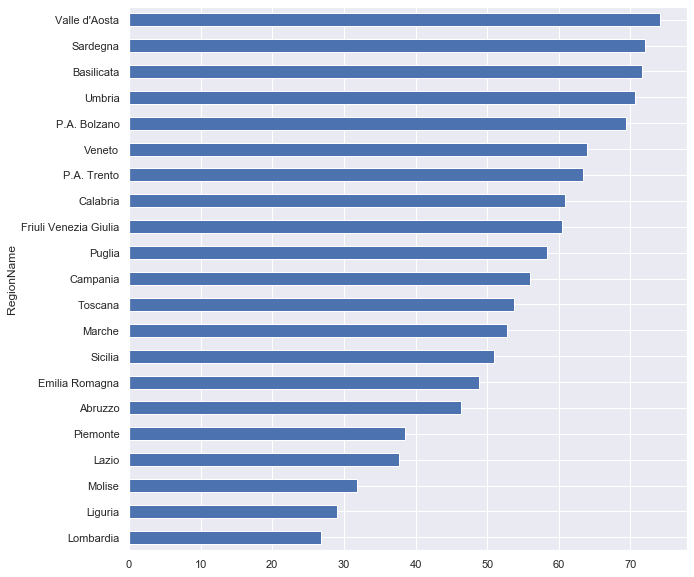

In [51]:
# Risultati in %
regione_new2['proportion_HC_TPC'].sort_values().plot.barh(figsize=(10,10))

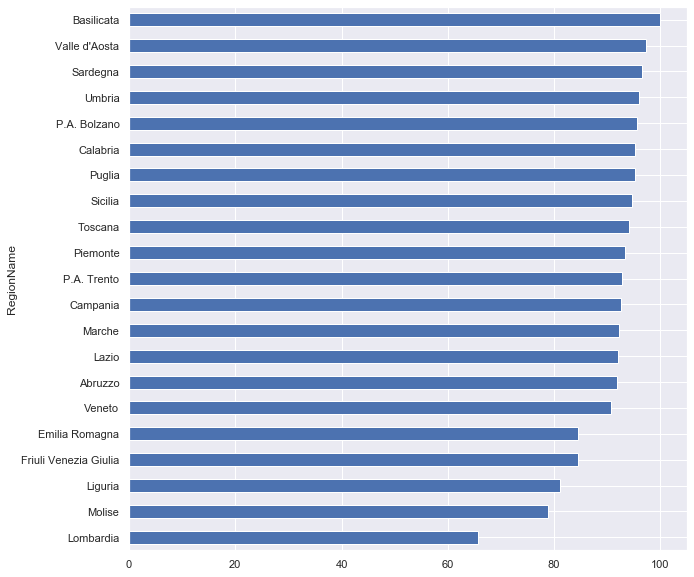

In [52]:
# Risultati in %
regione_new2['proportion_CPC_TPC'].sort_values().plot.barh(figsize=(10,10))

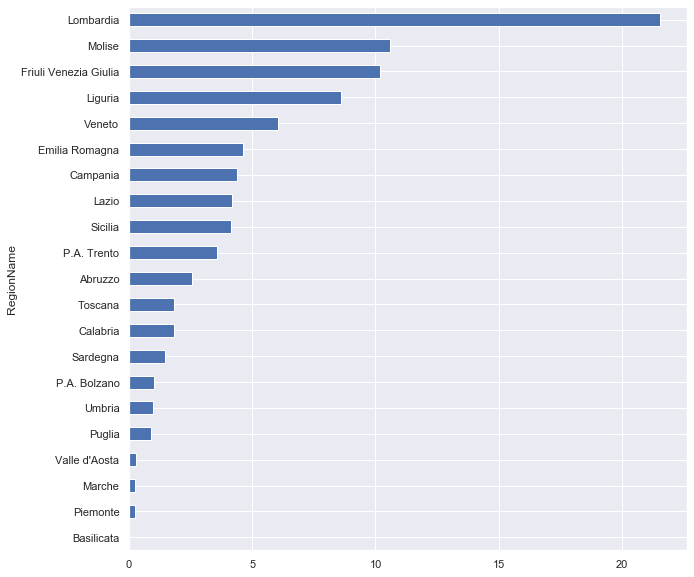

In [53]:
# Risultati in %
regione_new2['proportion_R_TPC'].sort_values().plot.barh(figsize=(10,10))

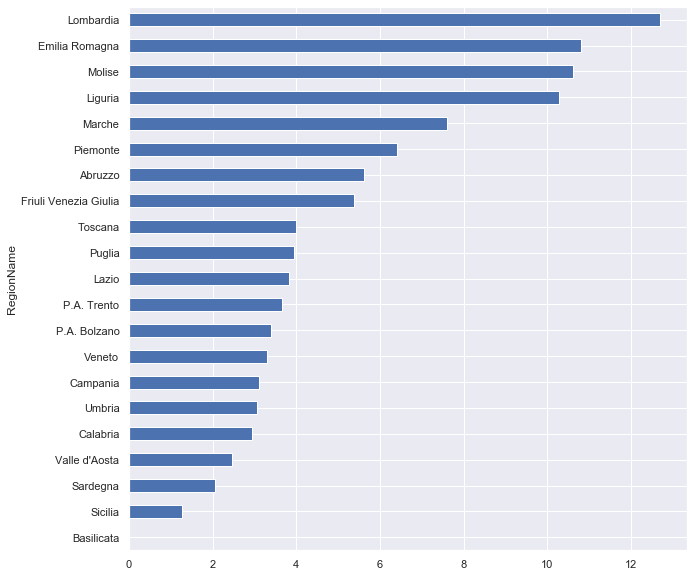

In [54]:
# Risultati di Letalità in %
regione_new2['proportion_D_TPC'].sort_values().plot.barh(figsize=(10,10))

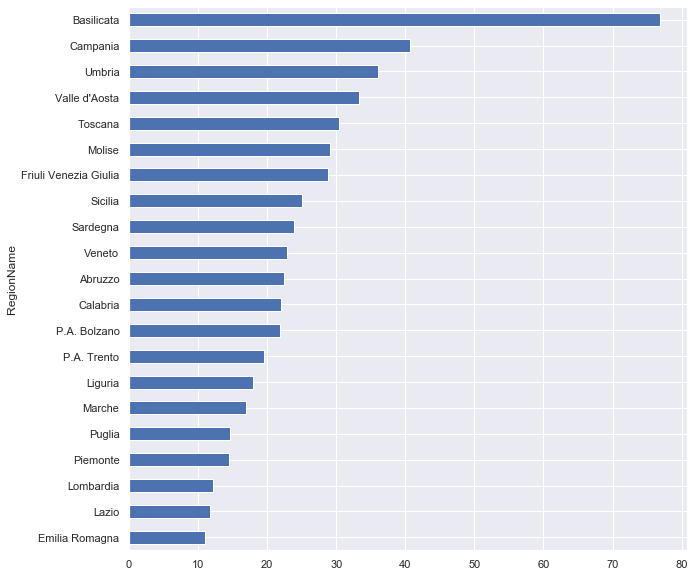

In [55]:
# Risultati in %
regione_new2['ratio_IC_HP'].sort_values().plot.barh(figsize=(10,10))

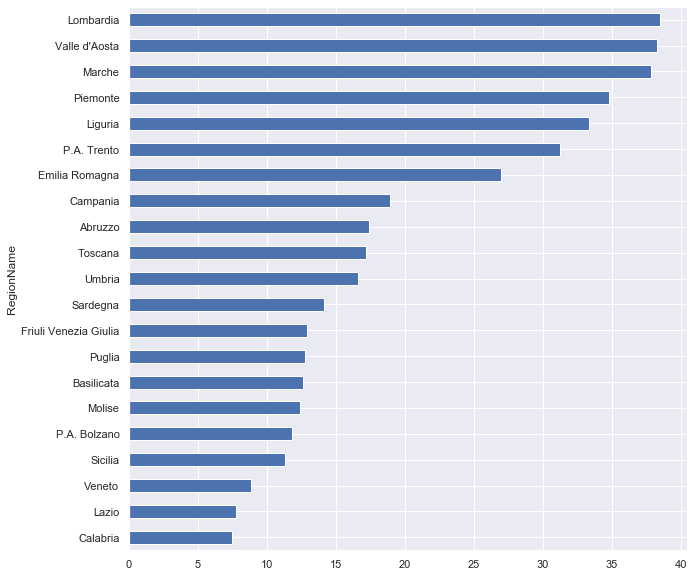

In [56]:
# Risultati in %
regione_new2['ratio_TPC_TeP'].sort_values().plot.barh(figsize=(10,10))

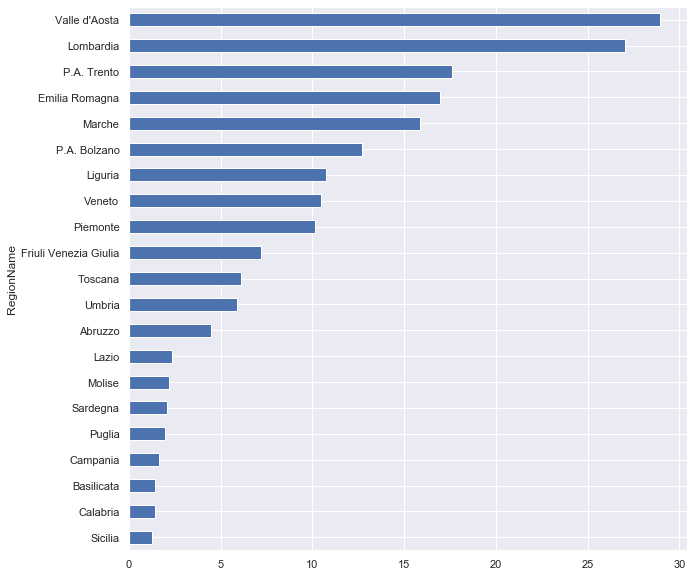

In [57]:
# Risultati di Prevalenza x 10000 abitanti
regione_new2['ratio_TPC_Pop'].sort_values().plot.barh(figsize=(10,10))

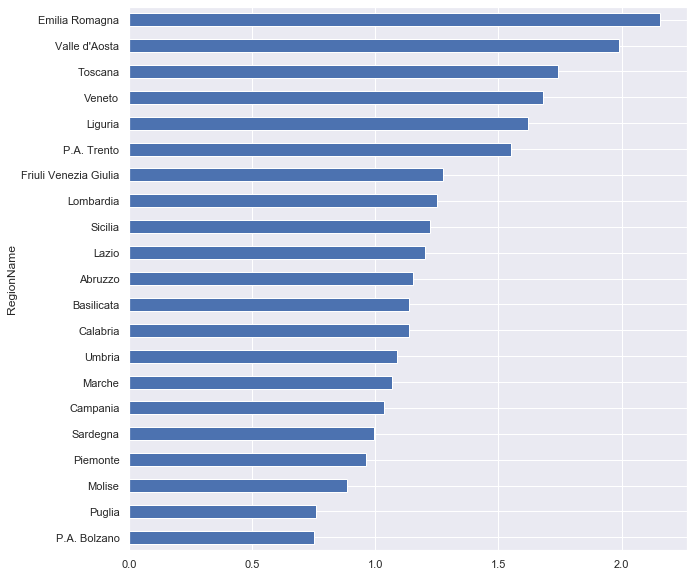

In [58]:
# Risultati dei Posti di Terapia Intensiva x 10000
regione_new2['ratio_PIR_Pop'].sort_values().plot.barh(figsize=(10,10))

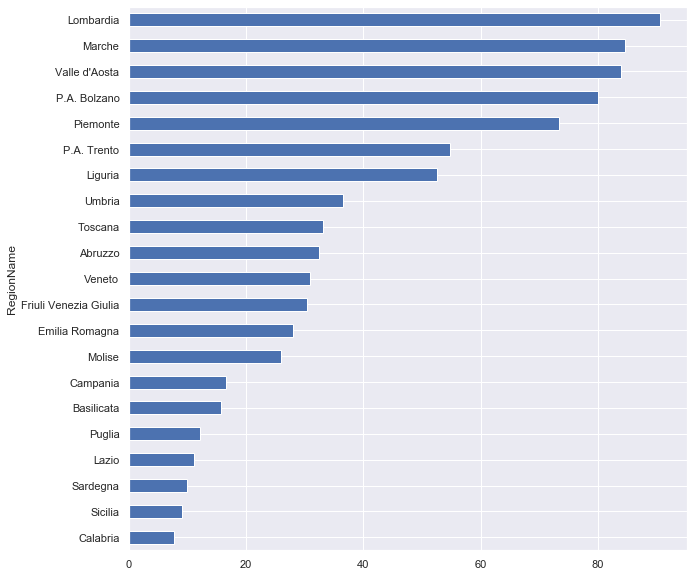

In [59]:
# Risultati di Occupazione in %
regione_new2['proportion_IC_PIR'].sort_values().plot.barh(figsize=(10,10))

Le raffigurazioni sugli indici evidenziano sì, la prevalenza della Lombardia nella prima posizione, ma mostrano come a seconda dell'indice considerato possono variare le regioni nelle successive posizioni. 
Quindi non in tutti gli indici rappresentati le regioni del Nord sono nella parte alta dei grafici.
Le valutazioni che si possono fare sui risultati ottenuti dalle raffigurazioni sopra proposte, possono essere legate, alcune, al semplice fatto che una data regione ha un numero di abitanti maggiore rispetto ad un'altra, altre a delle pure scelte politico-sanitarie regionali (es: n°posti letto intensivi per 10000 abitanti), altre ancora a fattori intriseci non al momento evidenziabili (es: considerando l'indicatore di Prevalenza, non è vero che all'aumentare della popolazione in una data regione si ha un aumento degli elementi infetti, si osservi infatti il Veneto e la Sicilia, il cui numero di abitanti è confrontabile).

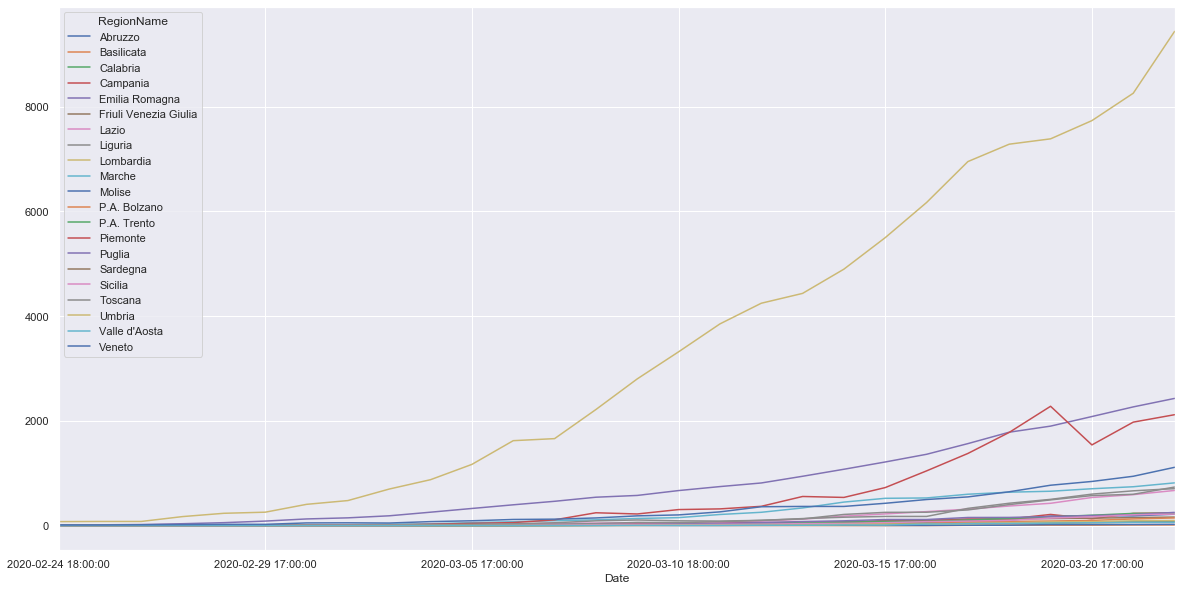

In [60]:
#Valutazione dell'anadamento dei pazienti ospedalizzati nell'arco di tempo presente nel dataset
fig, ax = plt.subplots(figsize=(20,10))
regione.groupby(['Date','RegionName'])['HospitalizedPatients'].max().unstack().plot(ax=ax)

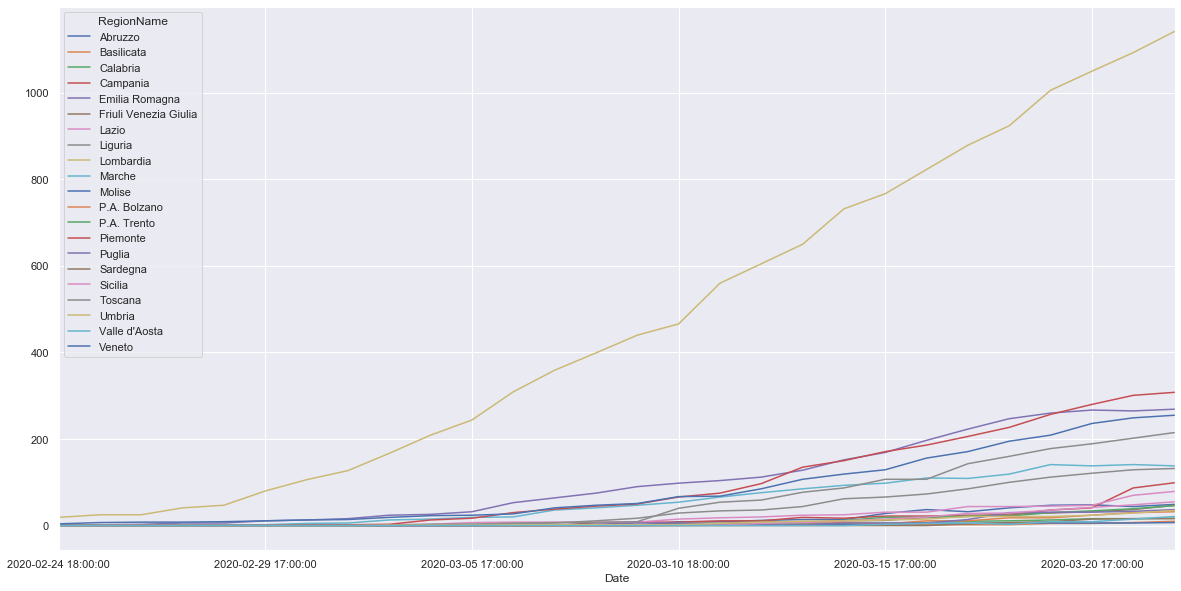

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
regione.groupby(['Date','RegionName'])['IntensiveCarePatients'].max().unstack().plot(ax=ax)

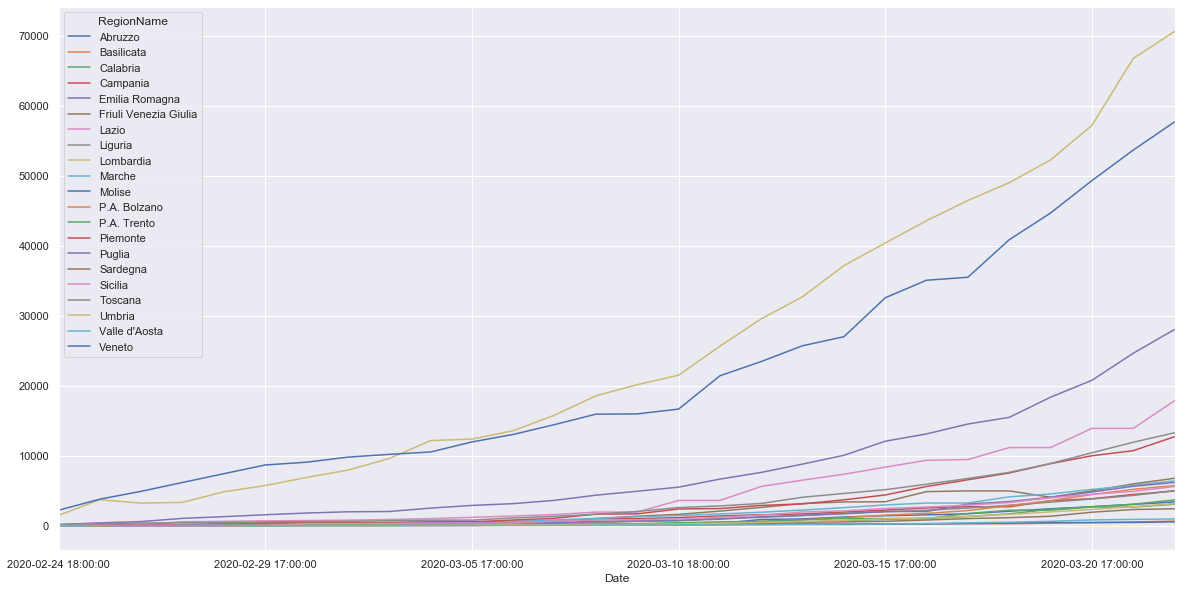

In [62]:
fig, ax = plt.subplots(figsize=(20,10))
regione.groupby(['Date','RegionName'])['TestsPerformed'].max().unstack().plot(ax=ax)

Il comportamento nel tempo degli attributi considerati evidenzia, in due casi, un andamento simil-esponenziale per le regioni, in modo particolare per la Lombardia e il Veneto(grafico n°3).
In un caso (grafico n°2) l'andamento sembra più proporzionale.
In tutte le raffigurazioni grafiche la Lombardia si presenta come la regione più interessata. 